# Задание
Основные цели этого задания:

- Научиться работать с документацией scikit-learn

- Научиться готовить данные к обучению модели и к ее валидации

- Научиться оценивать качество модели и выбирать лучшую модель, опираясь на метрики

Задача:

Построить модель машинного обучения, позволяющую спрогнозировать прогрессирование заболевания через год после исходного уровня.

План решения:

1) В документации библиотеки scikit learn найдите, как загрузить датасет для построения модели прогноза прогрессирования заболевания через год после исходного уровня.

2) Выведите содержимое поля DESCR, которое вернет функция, загружающая датасет, чтобы изучить содержимое датасета.

3) Подготовьте данные к обучению моделей: отделите целевой признак от датасета, разделите датасет на тренировочную и валидационную части.

4) Обучите решающее дерево и оцените адекватность обученной модели. Для этого достаточно сравнить метрики качества с метриками, получаемыми от простой модели. Например, если бы мы подавали на вход среднее значение целевой переменной на обучающей части выборки.

5) Обучите линейную регрессию и оцените ее адекватность.

6) Выберите лучшую модель и обоснуйте свой выбор.

Импорт нужный библиотек

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

import pandas as pd

In [ ]:
df = load_breast_cancer(as_frame=True).DESCR

In [ ]:
print(df)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Проще рабоать с данными через пандос, поэтому в приоретете будет он


In [ ]:
df1 = load_breast_cancer(as_frame=True).frame

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

В дата сете пропусков нет

In [ ]:
df1.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Попробуем реализовать алгоритм: Дерево решений

In [ ]:
df1['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [ ]:
for t in df1['target'].unique():
    print(f'==Class {t}==')
    display(df1.query(f'target == {t}').describe().loc[['min', 'mean', 'max'], :])

==Class 0==


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
min,10.95000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.02031,0.130800,0.04996,...,16.670000,85.10000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.05504,0.0
mean,17.46283,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.08799,0.192909,0.06268,...,29.318208,141.37033,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.09153,0.0
max,28.11000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.20120,0.304000,0.09744,...,49.540000,251.20000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.20750,0.0


==Class 1==


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,...,12.02000,50.410000,185.20000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210,1.0
mean,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,23.51507,87.005938,558.89944,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,1.0
max,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750,...,41.78000,127.100000,1210.00000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600,1.0


In [ ]:
features = df1.drop(['target'], axis=1)
target = df1['target']

print(features.shape)
print(target.shape)

(569, 30)
(569,)


In [ ]:
model = tree.DecisionTreeClassifier()
model.fit(features, target)

print(model)

DecisionTreeClassifier()


In [ ]:
features_train, features_val, target_train, target_val = train_test_split(features, target, test_size=0.3, random_state=45)

In [ ]:
target_train.value_counts(normalize=True).sort_index()

0    0.379397
1    0.620603
Name: target, dtype: float64

In [ ]:
target_val.value_counts(normalize=True).sort_index()

0    0.356725
1    0.643275
Name: target, dtype: float64

In [ ]:
model = tree.DecisionTreeClassifier()
model.fit(features_train, target_train)
predictions_val = model.predict(features_val)

def count_errors(true_answers, pred_answers):
    all_answers_together = zip(true_answers, pred_answers)
    errors_list = [1 if v[0] != v[1] else 0 for v in all_answers_together]
    return sum(errors_list)

print("Ошибок:", count_errors(target_val, predictions_val))

Ошибок: 14


In [ ]:
def accuracy(true_answers, pred_answers):
    all_answers_together = zip(true_answers, pred_answers)
    correct_answers_list = [1 if v[0] == v[1] else 0 for v in all_answers_together]
    return sum(correct_answers_list) / len(correct_answers_list)

print("Accuracy:", accuracy(target_val, predictions_val))

Accuracy: 0.9181286549707602


In [ ]:
print("Accuracy test built-in:", accuracy_score(target_val, predictions_val))

predictions_train = model.predict(features_train)
print("Accuracy train built-in:", accuracy_score(target_train, predictions_train))

Accuracy test built-in: 0.9181286549707602
Accuracy train built-in: 1.0


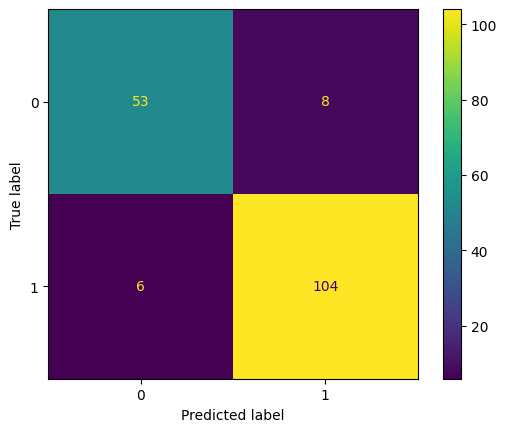

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(target_val, predictions_val)).plot()

Логистическая регрессия

In [ ]:
# определение переменных-предикторов и переменной ответа
X = df1.loc[:, df1.columns != 'target']
y = df1['target']

In [ ]:
# разделение набора данных на обучающий (70%) и тестовые (30%) наборы
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# создаем экземпляр модели
log_regression = LogisticRegression()

# тренировка модели с использованием обучающих данных
log_regression.fit(X_train,y_train)

# используем модель для составления прогнозов на основе тестовых данных
y_pred = log_regression.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 61,   2],
       [  6, 102]])

In [ ]:
print(" Accuracy:", accuracy_score(y_test, y_pred))

 Accuracy: 0.9532163742690059


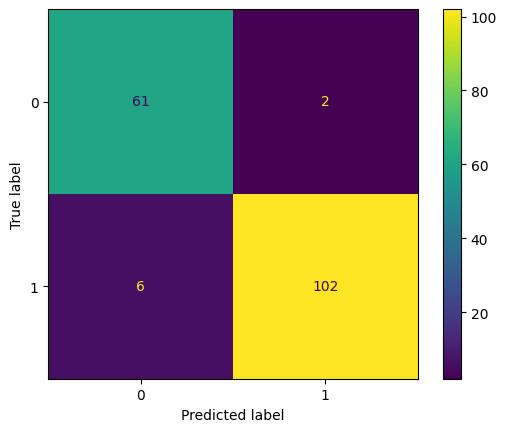

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

Мы можем построить кривую ROC (рабочая характеристика приемника), которая отображает процент истинных положительных результатов, предсказанных моделью, поскольку отсечка вероятности прогнозирования снижается с 1 до 0.

Чем выше AUC (площадь под кривой), тем точнее наша модель может предсказывать результаты

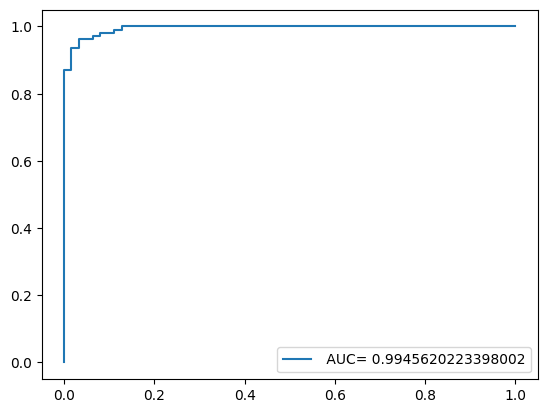

In [ ]:
# определение показателей
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# создаем кривую ROC
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.legend(loc=4)
plt.show()

**Вывод**
Выбор очевиден, логистичекая регрессиия показала более точные результаты, чем дерево решений)